In [1]:
import cv2
import os
import pandas as pd

In [2]:
parent_folder = 'QR codes/benign'
input_folder = os.path.join(parent_folder, 'benign')  # inner benign folder
output_folder = os.path.join(parent_folder, 'extracted_csv')

In [3]:
os.makedirs(output_folder, exist_ok=True)

In [4]:
csv_path = os.path.join(output_folder, 'benign_qr_data.csv')

In [5]:
data_list = []

detector = cv2.QRCodeDetector()

In [6]:
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_folder, filename)
        image = cv2.imread(file_path)

        # Detect and decode QR code
        data, bbox, _ = detector.detectAndDecode(image)
        if data:  # if QR code detected
            data_list.append({'url': data, 'label': 1})

In [7]:
df = pd.DataFrame(data_list)
df.to_csv(csv_path, index=False)

print(f"QR code URLs extracted and saved to {csv_path}")

QR code URLs extracted and saved to QR codes/benign/extracted_csv/benign_qr_data.csv


In [9]:
parent_folder = 'QR codes/malicious'
input_folder = os.path.join(parent_folder, 'malicious')  # inner benign folder
output_folder = os.path.join(parent_folder, 'extracted_csv')

In [10]:
os.makedirs(output_folder, exist_ok=True)

In [11]:
csv_path = os.path.join(output_folder, 'malicious_qr_data.csv')

In [12]:
data_list = []

detector = cv2.QRCodeDetector()

In [13]:
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_folder, filename)
        image = cv2.imread(file_path)

        # Detect and decode QR code
        data, bbox, _ = detector.detectAndDecode(image)
        if data:  # if QR code detected
            data_list.append({'url': data, 'label': 0})

In [14]:
df = pd.DataFrame(data_list)
df.to_csv(csv_path, index=False)

print(f"QR code URLs extracted and saved to {csv_path}")

QR code URLs extracted and saved to QR codes/malicious/extracted_csv/malicious_qr_data.csv


In [15]:
benign_csv = 'QR codes/benign/extracted_csv/benign_qr_data.csv'
malicious_csv = 'QR codes/malicious/extracted_csv/malicious_qr_data.csv'

In [16]:
df_benign = pd.read_csv(benign_csv)
df_malicious = pd.read_csv(malicious_csv)

# Ensure only 'url' and 'label' columns are kept
df_benign = df_benign[['url', 'label']]
df_malicious = df_malicious[['url', 'label']]

In [17]:
# Concatenate both datasets
df_merged = pd.concat([df_benign, df_malicious], ignore_index=True)

# Shuffle the rows
df_merged = df_merged.sample(frac=1, random_state=42).reset_index(drop=True)

# Add serial number column
df_merged.insert(0, 'serial_no', range(1, len(df_merged) + 1))

# Output file path
output_csv = 'QR codes/dataset.csv'

# Save merged CSV
df_merged.to_csv(output_csv, index=False)

print(f"Merged dataset saved to {output_csv}")

Merged dataset saved to QR codes/dataset.csv


In [19]:
df=pd.read_csv('QR codes/dataset.csv')

In [35]:
print(str(df['url'].iloc[2]))

83416    https://www.usidentify.com/l/castner
Name: url, dtype: object


In [36]:
import re
from urllib.parse import urlparse

In [38]:
df = pd.read_csv("QR codes/dataset.csv") 

In [39]:
def extract_features(url):
    features = {}
    parsed = urlparse(str(url))
    domain = parsed.netloc
    path = parsed.path
    query = parsed.query

    # Feature extraction
    features['url_length'] = len(url)
    features['num_dots'] = url.count('.')
    features['num_hyphens'] = url.count('-')
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_special_chars'] = sum(c in "?=&%" for c in url)
    features['has_https'] = 1 if url.lower().startswith("https") else 0
    features['num_subdirs'] = path.count('/')
    features['num_params'] = query.count('=') if query else 0
    features['has_ip_address'] = 1 if re.search(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', url) else 0

    # Top-level domain length
    tld_match = re.search(r'\.([a-z]+)(\/|$)', domain)
    features['tld_length'] = len(tld_match.group(1)) if tld_match else 0

    # Suspicious keyword presence
    suspicious_words = ['login', 'secure', 'verify', 'account', 'update', 'free', 'bonus', 'bank']
    features['contains_suspicious_words'] = 1 if any(word in url.lower() for word in suspicious_words) else 0

    return pd.Series(features)

# Apply feature extraction to every URL
feature_df = df['url'].apply(extract_features)

# Merge original dataframe + features
final_df = pd.concat([df, feature_df], axis=1)

# Save to new file
final_df.to_csv("dataset_with_feature_engg.csv", index=False)
print("✅ Feature engineered dataset saved as dataset_with_feature_engg.csv")

# Optional: show top few rows
print(final_df.head())

✅ Feature engineered dataset saved as dataset_with_feature_engg.csv
   serial_no  \
0          1   
1          2   
2          3   
3          4   
4          5   

                                                                                     url  \
0  408344    http://wisdomhomeloans.com.au/wire/ch/share/ve...\nName: url, dtype: object   
1                396314    http://www.hudsontea.net/zip/casts/\nName: url, dtype: object   
2                83416    https://www.usidentify.com/l/castner\nName: url, dtype: object   
3                    63667    https://www.registermymusic.com/\nName: url, dtype: object   
4              349389    http://okmum.com/bbs/data/formm.html/\nName: url, dtype: object   

   label  url_length  num_dots  num_hyphens  num_digits  num_special_chars  \
0      0          84         5            0           6                  0   
1      0          70         2            0           6                  0   
2      1          70         2            0     

In [41]:
df = pd.read_csv("QR codes/dataset_with_feature_engg_01.csv")

In [42]:
if 'label' in df.columns:
    df = df[[col for col in df.columns if col != 'label'] + ['label']]
    
df.to_csv("updated_file.csv", index=False)

print("'label' column moved to the end and saved as 'updated_file.csv'")

'label' column moved to the end and saved as 'updated_file.csv'


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [5]:
df = pd.read_csv("QR codes/dataset_feat_engg.csv")

In [6]:
target_column = 'label'
feature_columns = [col for col in df.columns if col != target_column and col!='serial_no' and col!='url']
print(feature_columns)

['url_length', 'num_dots', 'num_hyphens', 'num_digits', 'num_special_chars', 'has_https', 'num_subdirs', 'num_params', 'has_ip_address', 'tld_length', 'contains_suspicious_words']


In [7]:
X = df[feature_columns]   # Independent variables
y = df[target_column]  

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\n================ Logistic Regression ================")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


================ Logistic Regression ================
Accuracy: 74.28%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74     28442
           1       0.73      0.77      0.75     28513

    accuracy                           0.74     56955
   macro avg       0.74      0.74      0.74     56955
weighted avg       0.74      0.74      0.74     56955




Confusion Matrix:
[[20351  8091]
 [ 6559 21954]]


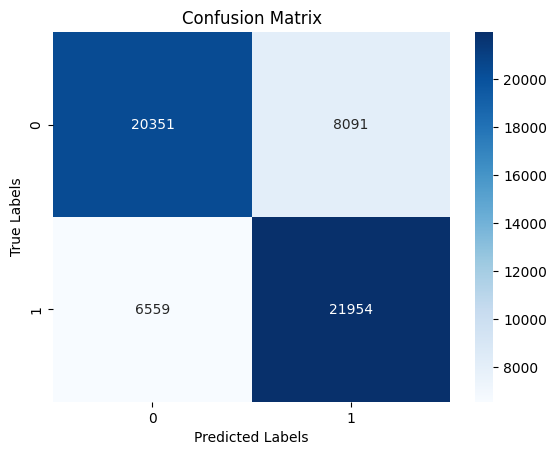

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB

In [43]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"\n================ Naive Bayes ================")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


================ Naive Bayes ================
Accuracy: 56.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.17      0.28     28442
           1       0.54      0.96      0.69     28513

    accuracy                           0.57     56955
   macro avg       0.68      0.57      0.49     56955
weighted avg       0.68      0.57      0.49     56955




Confusion Matrix:
[[ 4894 23548]
 [ 1042 27471]]


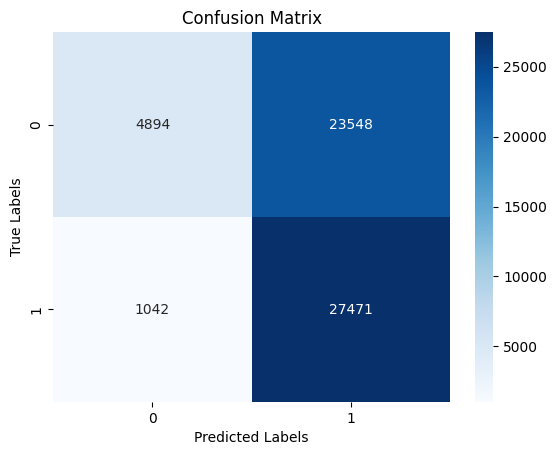

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [50]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # SVM
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print(f"\n================ Support Vector Machine ================")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[27415  1027]
 [ 1772 26741]]


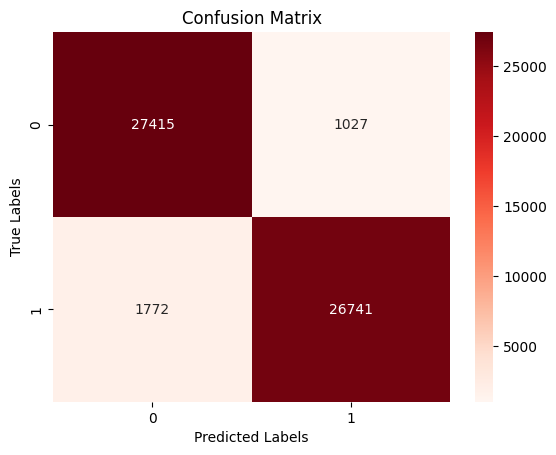

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}


================ Decision Tree ================
Accuracy: 97.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28442
           1       0.98      0.97      0.98     28513

    accuracy                           0.98     56955
   macro avg       0.98      0.98      0.98     56955
weighted avg       0.98      0.98      0.98     56955

Confusion Matrix:
[[27914   528]
 [  870 27643]]


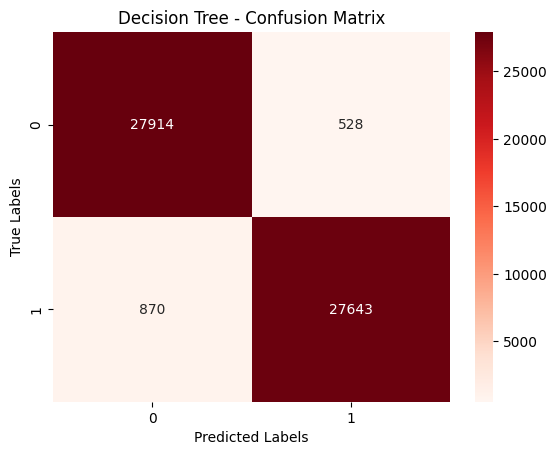


================ Random Forest ================
Accuracy: 97.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28442
           1       0.98      0.97      0.98     28513

    accuracy                           0.98     56955
   macro avg       0.98      0.98      0.98     56955
weighted avg       0.98      0.98      0.98     56955

Confusion Matrix:
[[27896   546]
 [  818 27695]]


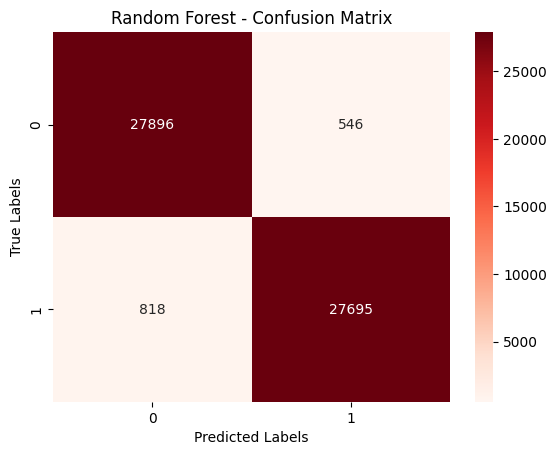

In [41]:
for name, model in models.items():
    print(f"\n================ {name} ================")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy & report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Visualize Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()